# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Illia Karbivnychyi

## What does a Simple Linear Regression Model do?
#### It uses the values of one or more independent variables to predict the value of a dependent variable.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = sns.load_dataset('diamonds')

In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* The r-value indicates the type and strength of two variables' linear correlation.
* R-values range between -1.00 and 1.00.
* R-values greater than 0.00 indicate a positive correlation.
* R-values less than 0.00 indicate a negative correlation.
* An r-value of 0.00 indicates that the two variables have no correlation.

In [4]:
#Note: It was not explicitly demonstrated that select_dtypes can take in a list argument, but I figured it out on my own.
data2 = data.select_dtypes(['float64', 'int64'])
data2.corr().head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

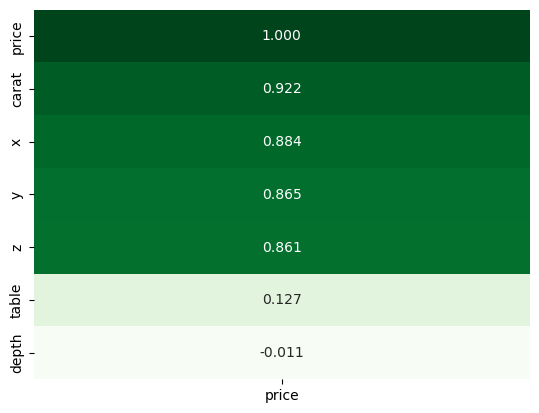

In [5]:
sns.heatmap(data=data2.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Split the dataset into a training dataset and a test dataset.
2. Create a linear regression model from the training dataset.
3. Validate the model using the test dataset.
4. If the model is valid, use it to predict data.

In [6]:
# Step 11 said to import these but they were already imported in Step 1.
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data2[['carat']], data2[['price']], test_size=0.3, random_state=20)

In [8]:
linearModel = LinearRegression()
print(linearModel)

LinearRegression()


In [9]:
linearModel.fit(x_train, y_train)

LinearRegression()

In [10]:
linearModel.score(x_test, y_test)

0.8504107786474794

In [11]:
y_predicted = linearModel.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [12]:
predicted_data = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted_data.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [13]:
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
predicted_data.reset_index(drop=True, inplace=True)
joined_data = x_test.join([y_test, predicted_data])
joined_data.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [14]:
melted_data = pd.melt(joined_data, id_vars='carat', value_vars=['price','predicted_price'], var_name='price_type', value_name='price_value')
melted_data

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


C:\Users\illia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


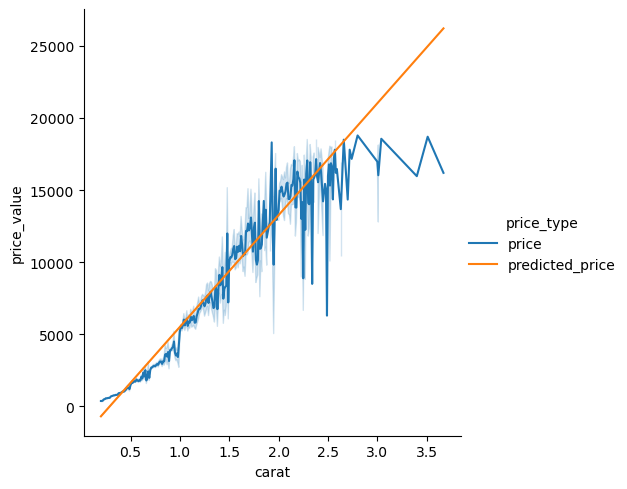

In [15]:
#Note: the graph still perfectly matches the sample output in Chapter 10 AssignmentB despite the UserWarning about layout.
sns.relplot(data=melted_data, kind='line', x='carat', y='price_value', hue='price_type')

## Regression line equation is **y = mx + b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [16]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [17]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [18]:
m = predicted.coef_
b = predicted.intercept_
print(f'The slope is {m} and the y-intercept is {b}')

The slope is [7756.42561797] and the y-intercept is -2256.3605800454575


In [19]:
print(f'Regression line equation is y = {m}x + {b}')

Regression line equation is y = [7756.42561797]x + -2256.3605800454575


In [20]:
carat = 0.70
price_est_1 = (int(m) * carat) + b
print(f'The predicted price for a {carat} carat diamond is ${price_est_1:,.2f}')

The predicted price for a 0.7 carat diamond is $3,172.84


In [21]:
carat = 0.54
price_est_2 = (int(m) * carat) + b
print(f'The predicted price for a {carat} carat diamond is ${price_est_2:,.2f}')

The predicted price for a 0.54 carat diamond is $1,931.88


## Results
* The predicted price of 3,172.84 for 0.70 carats is close to the actual price of 3,180.984246.
* The predicted price of 1,931.88 for 0.54 carats is close to the actual price of 1,940.075433.